In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from yellowbrick.features import PCA as YBPCA
from kneed import KneeLocator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
#import plotly.express as px

In [2]:
bike_autumn = pd.read_csv("bike_autumn.csv")
bike_autumn.head()

,Unnamed: 0,datetime,date,hour,season,holiday,open,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall
0,1,2018-09-01 00:00:00,2018-09-01,0,Autumn,No Holiday,Yes,1075,23.2,83,0.5,18870,20.1,0.0,0.0,0
1,2,2018-09-01 01:00:00,2018-09-01,1,Autumn,No Holiday,Yes,975,22.7,83,0.1,19400,19.6,0.0,0.0,0
2,3,2018-09-01 02:00:00,2018-09-01,2,Autumn,No Holiday,Yes,785,22.0,86,0.4,17030,19.5,0.0,0.0,0
3,4,2018-09-01 03:00:00,2018-09-01,3,Autumn,No Holiday,Yes,514,21.6,87,0.3,15790,19.3,0.0,0.0,0
4,5,2018-09-01 04:00:00,2018-09-01,4,Autumn,No Holiday,Yes,338,21.2,88,0.9,11830,19.1,0.0,0.0,0


In [3]:
bike_autumn_col = list(bike_autumn.columns)
bike_autumn_numeric_col = list(bike_autumn.describe().columns)
diff_names = []
for i in bike_autumn_col:
	if i not in bike_autumn_numeric_col:
		diff_names.append(i)
diff_names

['datetime', 'date', 'season', 'holiday', 'open']

In [4]:
bike_autumn2 = bike_autumn.copy()
bike_autumn2.drop(columns = diff_names,inplace=True)
#bike_autumn2.drop(columns = ['rent_count'], inplace = True)
bike_autumn2.drop(columns = ['rent_count','dewpoint_temp'], inplace = True)
bike_autumn2.head()

,Unnamed: 0,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall
0,1,0,23.2,83,0.5,18870,0.0,0.0,0
1,2,1,22.7,83,0.1,19400,0.0,0.0,0
2,3,2,22.0,86,0.4,17030,0.0,0.0,0
3,4,3,21.6,87,0.3,15790,0.0,0.0,0
4,5,4,21.2,88,0.9,11830,0.0,0.0,0


In [35]:
bike_autumn3 = bike_autumn2.iloc[: , 1:-1]
bike_autumn3.head()

,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall
0,0,23.2,83,0.5,18870,0.0,0.0
1,1,22.7,83,0.1,19400,0.0,0.0
2,2,22.0,86,0.4,17030,0.0,0.0
3,3,21.6,87,0.3,15790,0.0,0.0
4,4,21.2,88,0.9,11830,0.0,0.0


In [36]:
bike_autumn3.describe()

,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,11.500000,14.120833,59.228480,1.494734,15607.522894,0.521818,0.122756
std,6.923772,7.062297,18.686445,0.924440,5660.911180,0.798543,0.947098
min,0.000000,-3.000000,13.000000,0.000000,330.000000,0.000000,0.000000
25%,5.750000,8.575000,44.000000,0.800000,11817.500000,0.000000,0.000000
50%,11.500000,13.850000,59.000000,1.300000,19000.000000,0.000000,0.000000
75%,17.250000,19.800000,74.000000,2.000000,20000.000000,0.892500,0.000000
max,23.000000,30.500000,97.000000,5.700000,20000.000000,3.120000,18.000000


In [37]:
_ , p_value = calculate_bartlett_sphericity(bike_autumn3)
p_value

0.0

In [38]:
_, kmo_score = calculate_kmo(bike_autumn3)
kmo_score 

0.4703182882678534

In [39]:
colnames = list(bike_autumn3.columns)

scaler = StandardScaler(with_mean=True,with_std=True)
scaled_features = pd.DataFrame(scaler.fit_transform(bike_autumn3))

scaled_features.columns = colnames


In [42]:
N = 7
pca = PCA(n_components=N)
pca.fit(scaled_features)

PCA(n_components=7)

In [43]:

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(explained_variance_ratio, decimals=3))

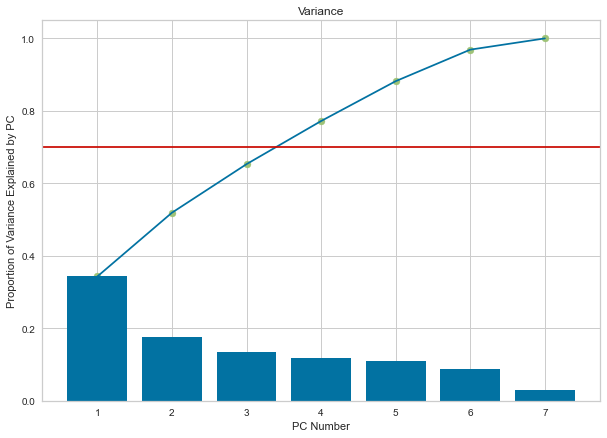

In [44]:
x = list(range(1,N+1))
plt.figure(figsize=(10, 7)) 
plt.bar(x,explained_variance_ratio)
plt.scatter(range(1,N+1),cumulative_variance)
plt.plot(x,cumulative_variance)
plt.title('Variance')
plt.xlabel('PC Number')
plt.ylabel('Proportion of Variance Explained by PC')
plt.axhline(y=0.7, color = 'r')

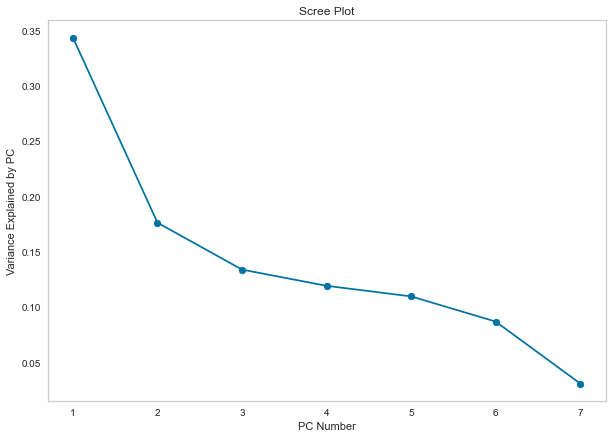

In [45]:

plt.figure(figsize=(10, 7)) 
plt.scatter(range(1,N+1),pca.explained_variance_ratio_)
plt.plot(range(1,N+1),pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('PC Number')
plt.ylabel('Variance Explained by PC')
plt.grid()

In [46]:
kl = KneeLocator(range(1, N+1), pca.explained_variance_ratio_, curve="convex", direction="decreasing")

kl.elbow


2

In [47]:

def evaluate_pcs(num_of_pcs,data):
    def encode_vals(x): #helper functions to suppress loading less than 0.7 
    #a gradual process to lead to this function
    # if x<=-0.5, we drop the variable
        if x <= -0.5 or x >= 0.5: #Adjust the threshold value 
            return x
        else:
            return("")    
    f = FactorAnalyzer(n_factors=num_of_pcs, method = 'principal',rotation='varimax') #Conduct PCA + varimax rotation to extract latent factors 
    f.fit(data)
    loadings = pd.DataFrame(f.loadings_).set_index(data.columns)
    loadings = loadings.applymap(encode_vals)
    loadingcols= list(loadings.columns)
    newcols = {}
    for i in loadingcols:
        newcols[i] = "PC" + str(i+1)
    loadings.rename(columns = newcols,inplace=True)
    return loadings

In [48]:


def CronbachAlpha(itemscores): #calculate the CronbachAlpha to see how closely related a set of items are as a group
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))



In [49]:
evaluate_pcs(2,scaled_features[colnames])

,PC1,PC2
hour,0.548971,
temperature,0.622712,
humidity,,0.695546
wind_speed,0.725353,
visibility,,-0.658113
solar_radiation,0.659953,
rainfall,,0.765506


In [50]:
print(CronbachAlpha(scaled_features[['hour','temperature','wind_speed','solar_radiation']])) #Reliability of PC1
print(CronbachAlpha(scaled_features[['humidity','rainfall']])) #Reliability of PC2

0.5922336853280734
0.391346648934483
